In [1]:
import pyart
import fsspec
import metpy
from metpy.plots import USCOUNTIES
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
import numpy as np

from pyart.testing import get_test_data
from matplotlib.dates import DateFormatter

In [3]:
fs = fsspec.filesystem("s3", anon=True)

In [4]:
files = sorted(fs.glob("s3://noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_13*"))
files

['noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_130435_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_131030_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_131630_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_132238_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_132846_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_133453_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_134059_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_134707_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_135314_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_135921_V06',
 'noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_135921_V06_MDM']

In [5]:
file = files[0]

In [6]:
print(file)

noaa-nexrad-level2/2023/05/19/KLOT/KLOT20230519_130435_V06


In [7]:
outfile = file.split('/')[-1][:-4]

In [8]:
radar = pyart.io.read_nexrad_archive(f's3://{file}')

In [9]:
list(radar.fields)

['reflectivity',
 'differential_reflectivity',
 'velocity',
 'spectrum_width',
 'cross_correlation_ratio',
 'clutter_filter_power_removed',
 'differential_phase']

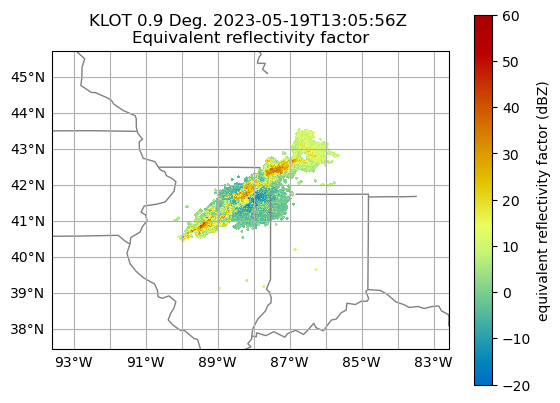

In [10]:
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     projection=ccrs.PlateCarree()
                    )

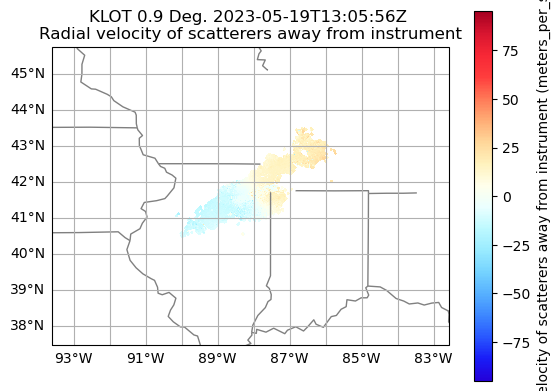

In [11]:
display.plot_ppi_map('velocity',
                     sweep=3,
                     projection=ccrs.PlateCarree(),
                    )

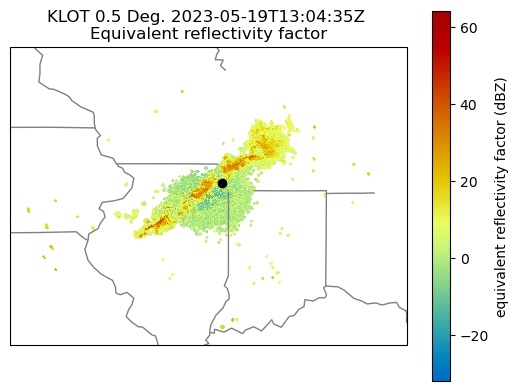

In [12]:
site_lon = -87.718485  # longitude in degrees
site_lat = 41.980269  # latitdue in degrees

# Setup the RadarMapDisplay and add our projection
display = pyart.graph.RadarMapDisplay(radar)
ax = plt.subplot(111, projection=ccrs.PlateCarree())

# Visualize the reflectivity field, using the lowest sweep with
# latitude and longitude lines
display.plot_ppi_map(
    "reflectivity",
    0,
    ax=ax,
    vmin=-32,
    vmax=64.0,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
)

# Plot our site location on top of the radar image
ax.scatter(site_lon, site_lat, color="black")

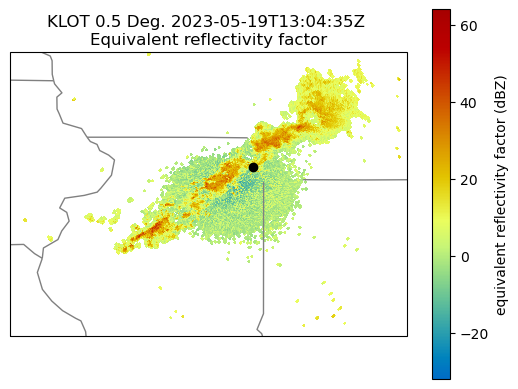

In [13]:
site_lon = -87.718485  # longitude in degrees
site_lat = 41.980269  # latitdue in degrees

# Setup the RadarMapDisplay and add our projection
display = pyart.graph.RadarMapDisplay(radar)
ax = plt.subplot(111, projection=ccrs.PlateCarree())

# Visualize the reflectivity field, using the lowest sweep with
# latitude and longitude lines
display.plot_ppi_map(
    "reflectivity",
    0,
    ax=ax,
    vmin=-32,
    vmax=64.0,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
)
plt.xlim(-92, -85)
plt.ylim(39, 44)

# Plot our site location on top of the radar image
ax.scatter(site_lon, site_lat, color="black")

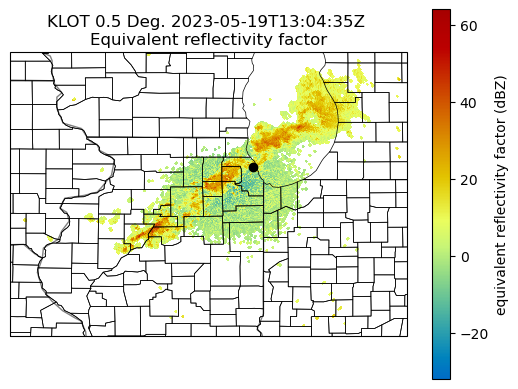

In [14]:
site_lon = -87.718485  # longitude in degrees
site_lat = 41.980269  # latitdue in degrees

# Setup the RadarMapDisplay and add our projection
display = pyart.graph.RadarMapDisplay(radar)
ax = plt.subplot(111, projection=ccrs.PlateCarree())

# Visualize the reflectivity field, using the lowest sweep with
# latitude and longitude lines
display.plot_ppi_map(
    "reflectivity",
    0,
    ax=ax,
    vmin=-32,
    vmax=64.0,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
)
plt.xlim(-92, -85)
plt.ylim(39, 44)

ax.add_feature(USCOUNTIES,
                linewidth=0.5)

# Plot our site location on top of the radar image
ax.scatter(site_lon, site_lat, color="black")

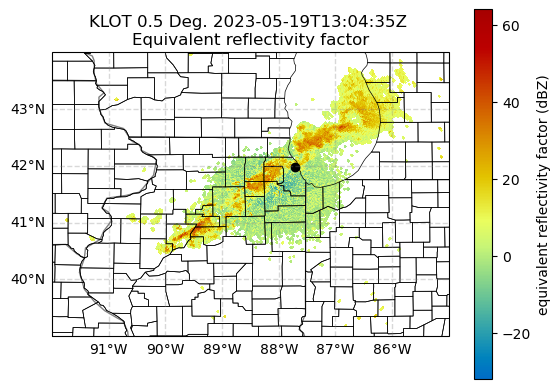

In [12]:
site_lon = -87.718485  # longitude in degrees
site_lat = 41.980269  # latitdue in degrees

# Setup the RadarMapDisplay and add our projection
display = pyart.graph.RadarMapDisplay(radar)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
radar_id = 'KLOT'

# Visualize the reflectivity field, using the lowest sweep with
# latitude and longitude lines
display.plot_ppi_map(
    "reflectivity",
    0,
    ax=ax,
    vmin=-32,
    vmax=64.0,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
)
plt.xlim(-92, -85)
plt.ylim(39, 44)

gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1, 
                  color='gray', 
                  alpha=0.3,
                  linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False


gl.xlabel_style = {'fontsize':10}
gl.ylabel_style = {'fontsize':10}

ax.add_feature(USCOUNTIES,
                linewidth=0.5)

# Plot our site location on top of the radar image
ax.scatter(site_lon, site_lat, color="black")

In [25]:
ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)

In [26]:
ds

<xarray.Dataset>
Dimensions:                       (height: 18)
Coordinates:
  * height                        (height) float64 859.0 859.0 ... 1.859e+04
Data variables:
    reflectivity                  (height) float64 17.5 18.5 16.0 ... nan nan
    differential_reflectivity     (height) float64 -0.4062 nan -0.25 ... nan nan
    velocity                      (height) float64 nan 14.0 nan ... nan nan nan
    spectrum_width                (height) float64 nan 2.0 nan ... nan nan nan
    cross_correlation_ratio       (height) float64 1.002 nan 0.9983 ... nan nan
    clutter_filter_power_removed  (height) float64 nan nan nan ... nan nan nan
    differential_phase            (height) float64 57.12 nan 57.12 ... nan nan
    base_time                     datetime64[ns] 2023-05-19T13:59:21
    time_offset                   (height) datetime64[ns] 2023-05-19T13:59:39...
Attributes:
    distance_from_radar:    51.641 km
    azimuth:                35.857 degrees
    latitude_of_location:   41.980269 degrees
    longitude_of_location:  -87.718485 degrees

In [27]:
print(ds)

<xarray.Dataset>
Dimensions:                       (height: 18)
Coordinates:
  * height                        (height) float64 859.0 859.0 ... 1.859e+04
Data variables:
    reflectivity                  (height) float64 17.5 18.5 16.0 ... nan nan
    differential_reflectivity     (height) float64 -0.4062 nan -0.25 ... nan nan
    velocity                      (height) float64 nan 14.0 nan ... nan nan nan
    spectrum_width                (height) float64 nan 2.0 nan ... nan nan nan
    cross_correlation_ratio       (height) float64 1.002 nan 0.9983 ... nan nan
    clutter_filter_power_removed  (height) float64 nan nan nan ... nan nan nan
    differential_phase            (height) float64 57.12 nan 57.12 ... nan nan
    base_time                     datetime64[ns] 2023-05-19T13:59:21
    time_offset                   (height) datetime64[ns] 2023-05-19T13:59:39...
Attributes:
    distance_from_radar:    51.641 km
    azimuth:                35.857 degrees
    latitude_of_location:   41.

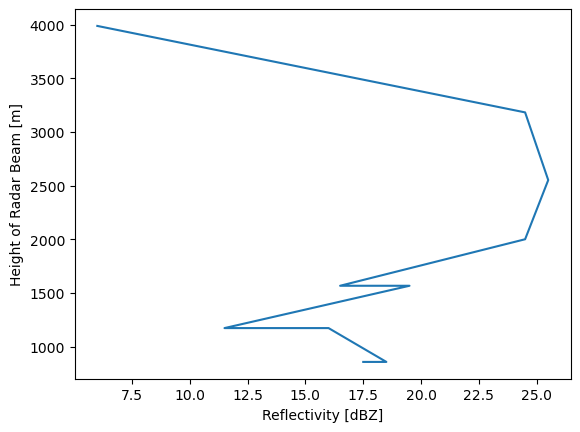

In [28]:
ds.reflectivity.plot(y="height")

In [17]:
for file in files:
    radar = pyart.io.read_nexrad_archive(f's3://{file}')
    ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)
    del ds['base_time'].attrs['units']
    del ds['time_offset'].attrs['units']
    outfile = file.split('/')[-1][:-4]
    ds.to_netcdf('NEXRAD_Data/' + outfile + '.nc')

OSError: unknown compression record

In [29]:
import glob
import xarray as xr
import os
files = sorted(glob.glob('NEXRAD_Data/*.nc'))

In [30]:
print(files)

['NEXRAD_Data/KLOT20230519_130435.nc', 'NEXRAD_Data/KLOT20230519_131030.nc', 'NEXRAD_Data/KLOT20230519_131630.nc', 'NEXRAD_Data/KLOT20230519_132238.nc', 'NEXRAD_Data/KLOT20230519_132846.nc', 'NEXRAD_Data/KLOT20230519_133453.nc', 'NEXRAD_Data/KLOT20230519_134059.nc', 'NEXRAD_Data/KLOT20230519_134707.nc', 'NEXRAD_Data/KLOT20230519_135314.nc', 'NEXRAD_Data/KLOT20230519_135921.nc']


In [31]:
pyart.__version__

'1.15.2'

In [21]:
def doubles(ds):
    return ds.drop_duplicates(dim="height").interp(height = np.arange(300,5500,500))
ds = xr.open_mfdataset(files,preprocess = doubles, combine='nested', concat_dim = 'base_time')


In [22]:
ds

<xarray.Dataset>
Dimensions:                       (base_time: 10, height: 11)
Coordinates:
  * base_time                     (base_time) datetime64[ns] 2023-05-19T13:04...
  * height                        (height) int64 300 800 1300 ... 4300 4800 5300
Data variables:
    cross_correlation_ratio       (base_time, height) float64 dask.array<chunksize=(1, 11), meta=np.ndarray>
    velocity                      (base_time, height) float64 dask.array<chunksize=(1, 11), meta=np.ndarray>
    reflectivity                  (base_time, height) float64 dask.array<chunksize=(1, 11), meta=np.ndarray>
    clutter_filter_power_removed  (base_time, height) float64 dask.array<chunksize=(1, 11), meta=np.ndarray>
    differential_reflectivity     (base_time, height) float64 dask.array<chunksize=(1, 11), meta=np.ndarray>
    spectrum_width                (base_time, height) float64 dask.array<chunksize=(1, 11), meta=np.ndarray>
    differential_phase            (base_time, height) float64 dask.array<chunksize=(1, 11), meta=np.ndarray>
Attributes:
    distance_from_radar:    51.641 km
    azimuth:                35.857 degrees
    latitude_of_location:   41.980269 degrees
    longitude_of_location:  -87.718485 degrees

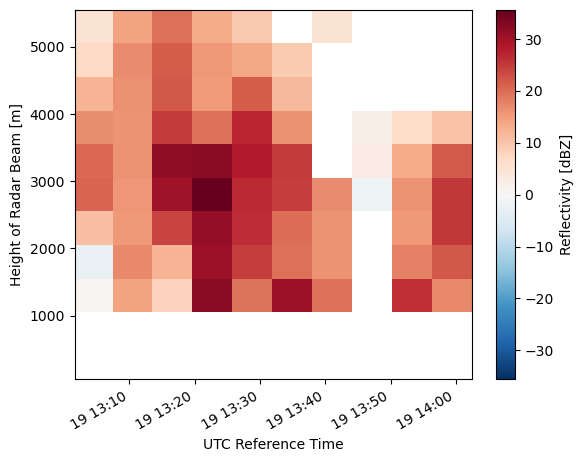

In [23]:
ds.reflectivity.plot(y='height')

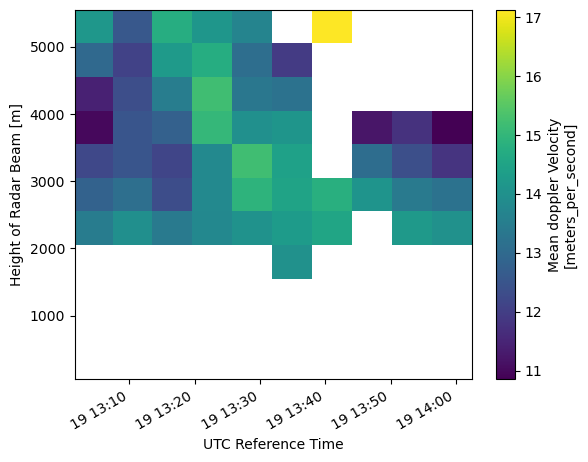

In [24]:
ds.velocity.plot(y='height')

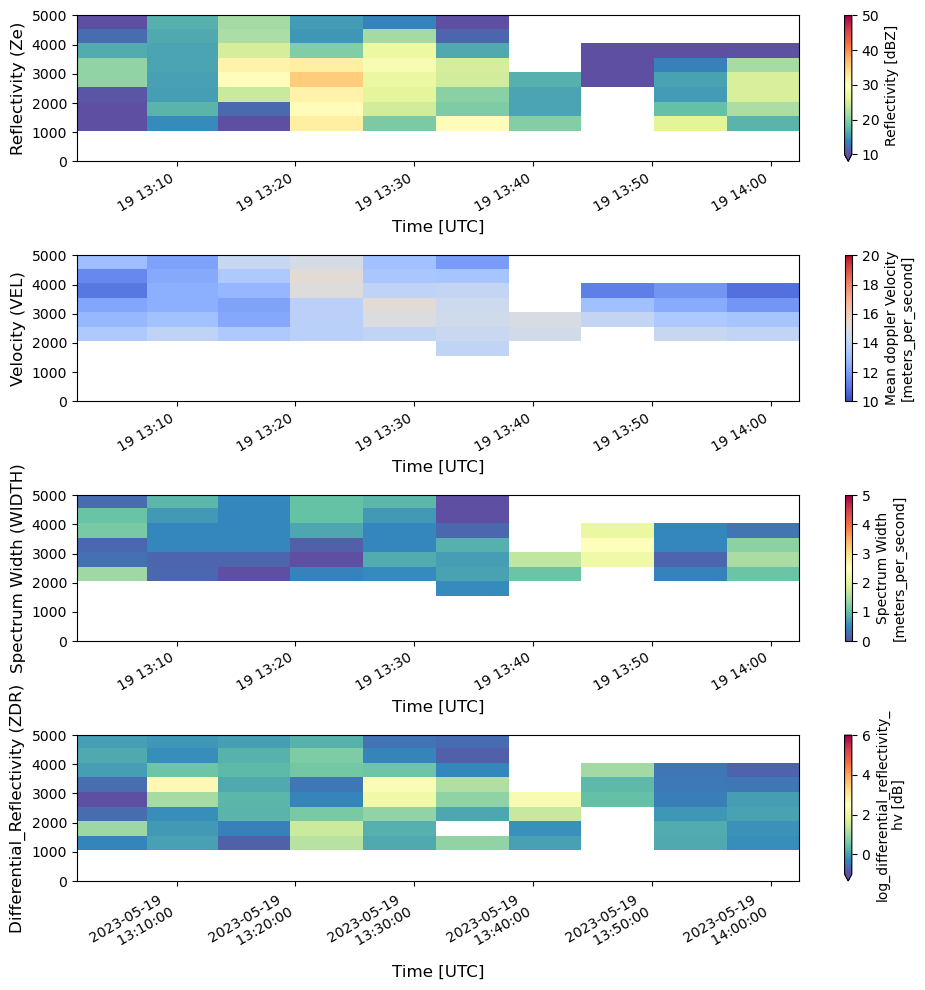

In [29]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["reflectivity"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Reflectivity (Ze)', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["velocity"].T.plot(cmap='coolwarm', vmin=10, vmax=20, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["spectrum_width"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectrum Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["differential_reflectivity"].T.plot(cmap='Spectral_r', vmin=-1, vmax=6, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('Differential_Reflectivity (ZDR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()

In [32]:
def doubles(ds):
    return ds.drop_duplicates(dim="height").interp(height = np.arange(300,5500,100))
ds = xr.open_mfdataset(files,preprocess = doubles, combine='nested', concat_dim = 'base_time')


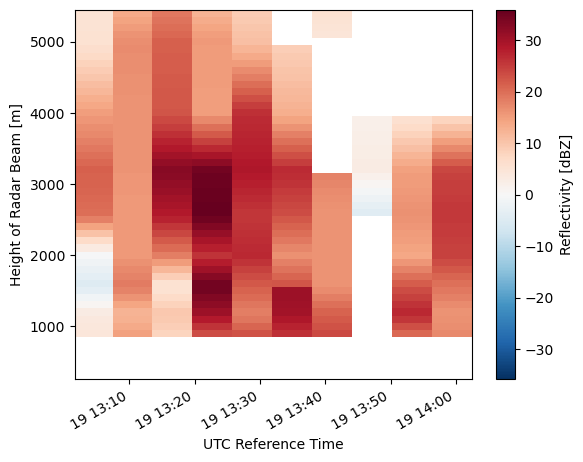

In [33]:
ds.reflectivity.plot(y='height')

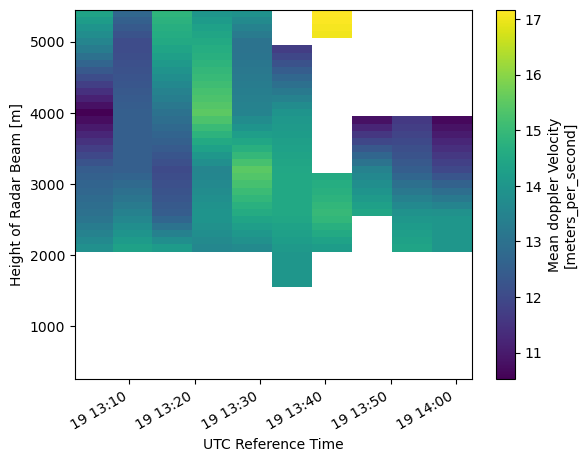

In [34]:
ds.velocity.plot(y='height')

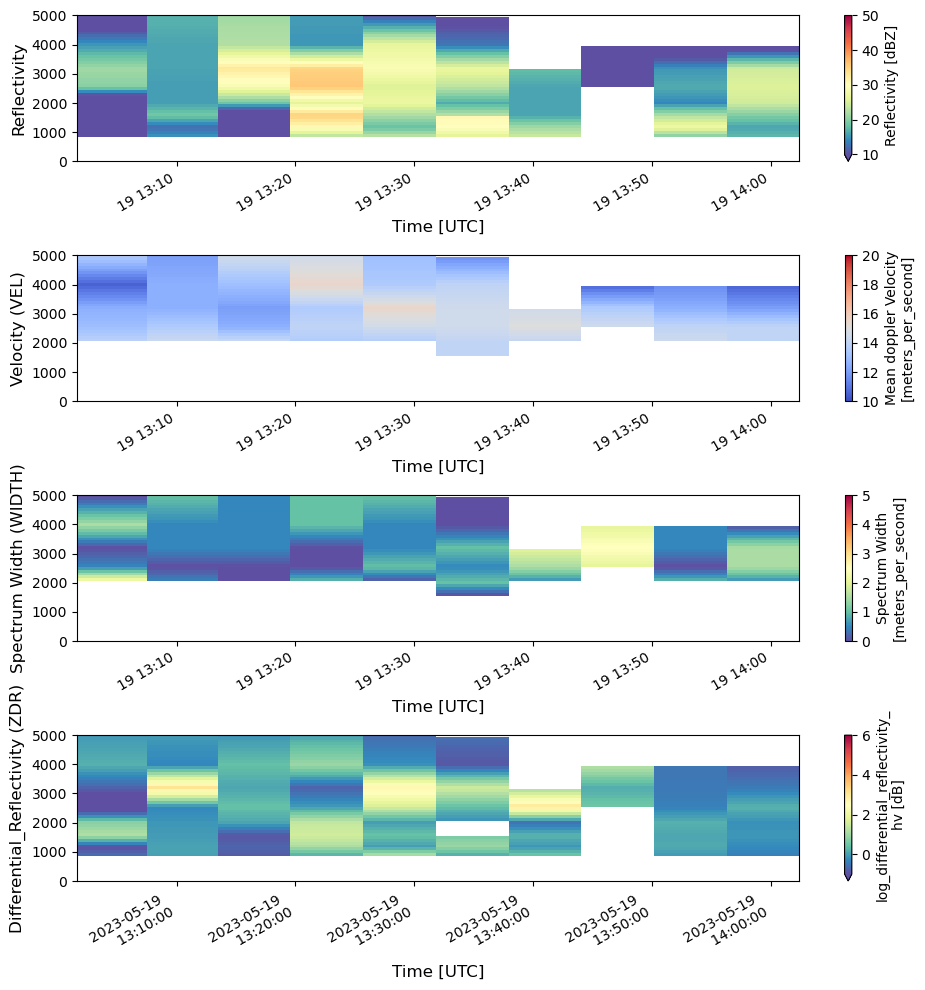

In [35]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["reflectivity"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Reflectivity', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["velocity"].T.plot(cmap='coolwarm', vmin=10, vmax=20, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["spectrum_width"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectrum Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["differential_reflectivity"].T.plot(cmap='Spectral_r', vmin=-1, vmax=6, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('Differential_Reflectivity (ZDR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
plt.savefig("NEXRAD_May_19th.png",dpi=500)

In [3]:
pip install radtraq

Note: you may need to restart the kernel to use updated packages.


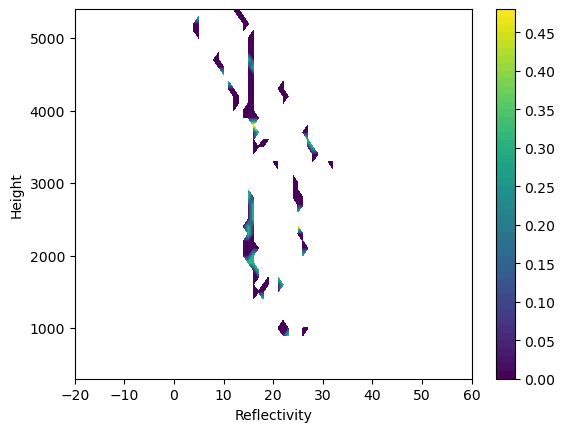

In [37]:
import radtraq
from act.io.armfiles import read_netcdf
import matplotlib.pyplot as plt

# Read in example data

# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'reflectivity', height_variable='height')

# Plot CFAD histogram
dims = data_array.dims
display = radtraq.plotting.cfad.plot_cfad(data_array, data_array[dims[1]], data_array[dims[0]])
plt.xlabel('Reflectivity'), plt.ylabel('Height')
plt.xlim(-20,60)
plt.savefig("RadTraQ_NEXRAD_May_19th.png",dpi=500)
plt.show()

In [38]:
fs = fsspec.filesystem("s3", anon=True)
files = sorted(fs.glob("s3://noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_13*"))
files

['noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_130353_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_130830_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_131307_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_131752_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_132236_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_132721_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_133205_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_133649_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_134133_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_134617_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_135101_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_135545_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_135545_V06_MDM']

In [39]:
file = files[0]

In [40]:
print(file)

noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_130353_V06


In [41]:
outfile = file.split('/')[-1][:-4]
radar = pyart.io.read_nexrad_archive(f's3://{file}')

In [42]:
list(radar.fields)

['reflectivity',
 'differential_reflectivity',
 'velocity',
 'spectrum_width',
 'cross_correlation_ratio',
 'clutter_filter_power_removed',
 'differential_phase']

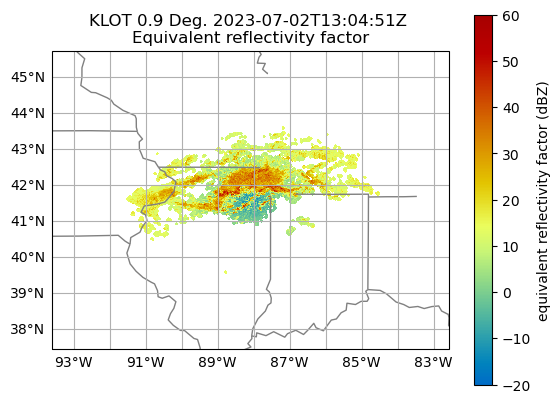

In [43]:
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     projection=ccrs.PlateCarree()
                    )

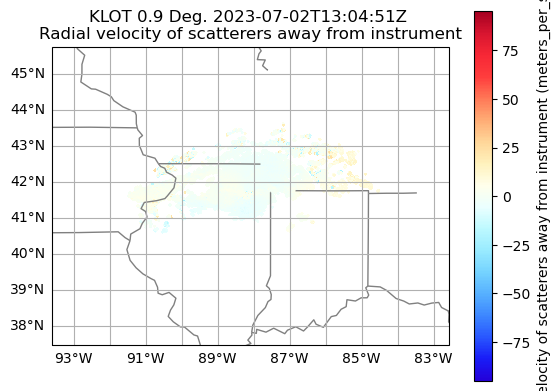

In [44]:
display.plot_ppi_map('velocity',
                     sweep=3,
                     projection=ccrs.PlateCarree(),
                    )

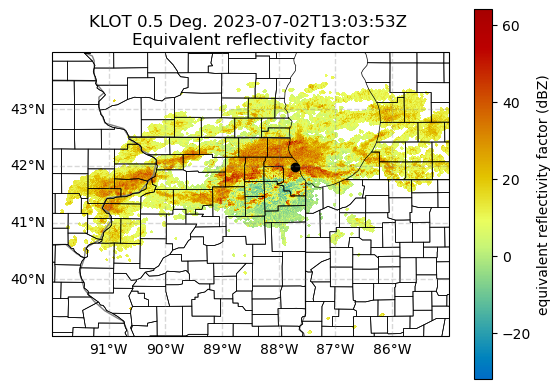

In [45]:
site_lon = -87.718485  # longitude in degrees
site_lat = 41.980269  # latitdue in degrees

# Setup the RadarMapDisplay and add our projection
display = pyart.graph.RadarMapDisplay(radar)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
radar_id = 'KLOT'

# Visualize the reflectivity field, using the lowest sweep with
# latitude and longitude lines
display.plot_ppi_map(
    "reflectivity",
    0,
    ax=ax,
    vmin=-32,
    vmax=64.0,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
)
plt.xlim(-92, -85)
plt.ylim(39, 44)

gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1, 
                  color='gray', 
                  alpha=0.3,
                  linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False


gl.xlabel_style = {'fontsize':10}
gl.ylabel_style = {'fontsize':10}

ax.add_feature(USCOUNTIES,
                linewidth=0.5)

# Plot our site location on top of the radar image
ax.scatter(site_lon, site_lat, color="black")

In [46]:
ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)
ds

<xarray.Dataset>
Dimensions:                       (height: 17)
Coordinates:
  * height                        (height) float64 820.0 820.0 ... 1.863e+04
Data variables:
    reflectivity                  (height) float64 13.5 20.5 24.5 ... nan nan
    differential_reflectivity     (height) float64 -0.2812 nan 1.5 ... nan nan
    velocity                      (height) float64 nan -2.5 nan ... nan nan nan
    spectrum_width                (height) float64 nan 1.5 nan ... nan nan nan
    cross_correlation_ratio       (height) float64 0.9183 nan 0.9817 ... nan nan
    clutter_filter_power_removed  (height) float64 nan nan nan ... nan nan nan
    differential_phase            (height) float64 74.05 nan 65.58 ... nan nan
    base_time                     datetime64[ns] 2023-07-02T13:03:53
    time_offset                   (height) datetime64[ns] 2023-07-02T13:04:06...
Attributes:
    distance_from_radar:    51.641 km
    azimuth:                35.857 degrees
    latitude_of_location:   41.980269 degrees
    longitude_of_location:  -87.718485 degrees

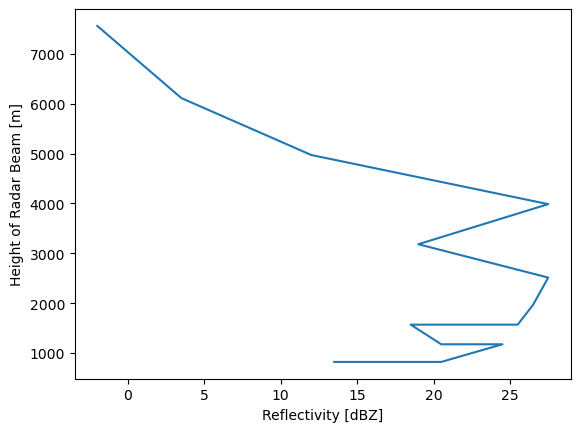

In [47]:
ds.reflectivity.plot(y="height")

In [48]:
for file in files:
    radar = pyart.io.read_nexrad_archive(f's3://{file}')
    ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)
    del ds['base_time'].attrs['units']
    del ds['time_offset'].attrs['units']
    outfile = file.split('/')[-1][:-4]
    ds.to_netcdf('NEXRAD_Data_2/' + outfile + '.nc')

OSError: unknown compression record

In [49]:
import glob
import xarray as xr
import os
files = sorted(glob.glob('NEXRAD_Data_2/*.nc'))

In [50]:
print(files)

['NEXRAD_Data_2/KLOT20230702_130353.nc', 'NEXRAD_Data_2/KLOT20230702_130830.nc', 'NEXRAD_Data_2/KLOT20230702_131307.nc', 'NEXRAD_Data_2/KLOT20230702_131752.nc', 'NEXRAD_Data_2/KLOT20230702_132236.nc', 'NEXRAD_Data_2/KLOT20230702_132721.nc', 'NEXRAD_Data_2/KLOT20230702_133205.nc', 'NEXRAD_Data_2/KLOT20230702_133649.nc', 'NEXRAD_Data_2/KLOT20230702_134133.nc', 'NEXRAD_Data_2/KLOT20230702_134617.nc', 'NEXRAD_Data_2/KLOT20230702_135101.nc', 'NEXRAD_Data_2/KLOT20230702_135545.nc']


In [51]:
def doubles(ds):
    return ds.drop_duplicates(dim="height").interp(height = np.arange(300,5500,100))
ds = xr.open_mfdataset(files,preprocess = doubles, combine='nested', concat_dim = 'base_time')

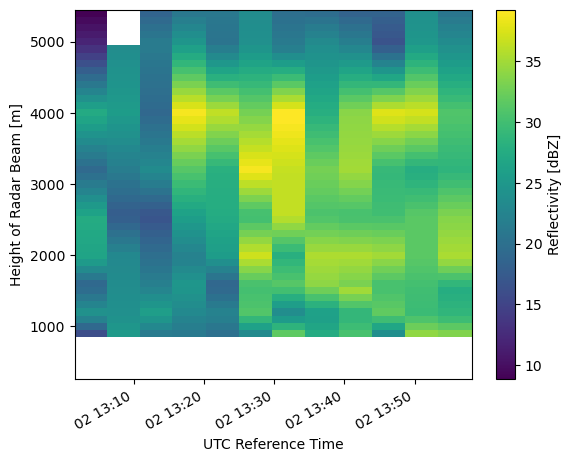

In [52]:
ds.reflectivity.plot(y='height')

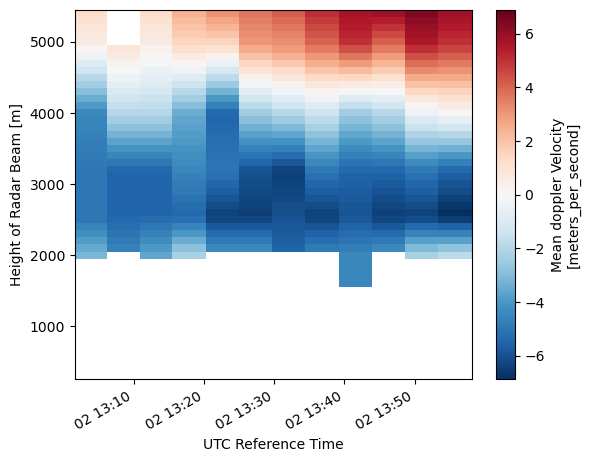

In [53]:
ds.velocity.plot(y='height')

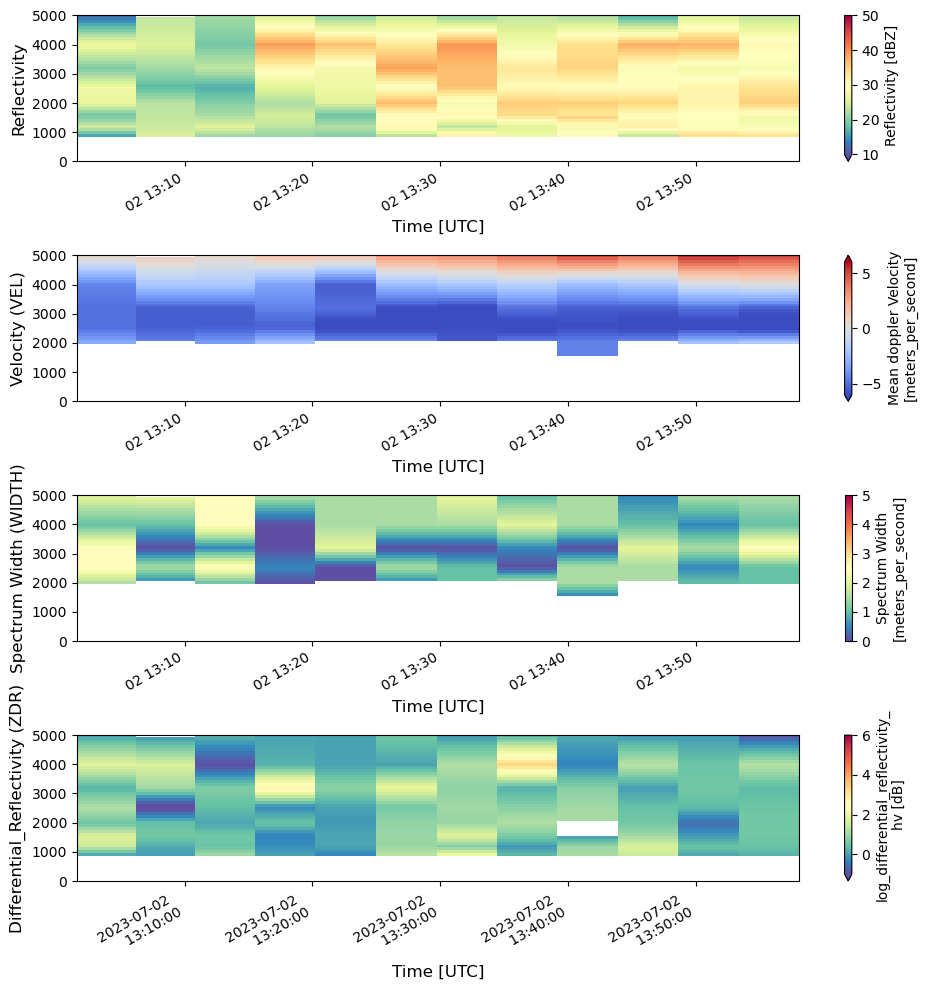

In [57]:
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ds["reflectivity"].T.plot(cmap='Spectral_r', vmin=10, vmax=50, ax=ax[0])
ax[0].set_xlabel('Time [UTC]', fontsize=12), ax[0].set_ylabel('Reflectivity', fontsize=12)
ax[0].set_ylim(0, 5000)
ds["velocity"].T.plot(cmap='coolwarm', vmin=-6, vmax=6, ax=ax[1])
ax[1].set_xlabel('Time [UTC]', fontsize=12), ax[1].set_ylabel('Velocity (VEL)', fontsize=12)
ax[1].set_ylim(0, 5000)
ds["spectrum_width"].T.plot(cmap='Spectral_r', vmin=0, vmax=5, ax=ax[2])
ax[2].set_xlabel('Time [UTC]', fontsize=12), ax[2].set_ylabel('Spectrum Width (WIDTH)', fontsize=12)
ax[2].set_ylim(0, 5000)
ds["differential_reflectivity"].T.plot(cmap='Spectral_r', vmin=-1, vmax=6, ax=ax[3])
ax[3].set_xlabel('Time [UTC]', fontsize=12), ax[3].set_ylabel('Differential_Reflectivity (ZDR)', fontsize=12)
ax[3].set_ylim(0, 5000)
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
fig.tight_layout()
plt.savefig("NEXRAD_July_2nd.png",dpi=500)

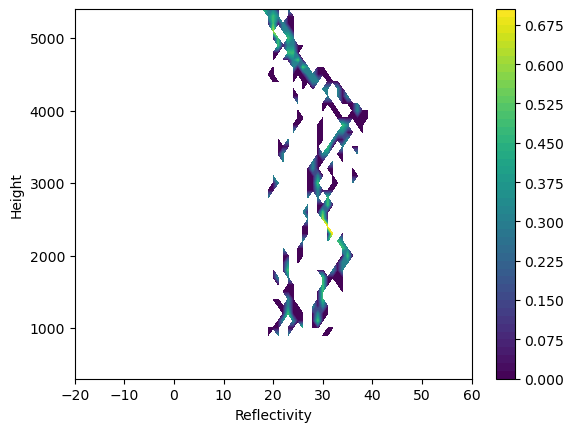

In [56]:
import radtraq
from act.io.armfiles import read_netcdf

# Read in example data


# Calculate CFAD histogram
data_array = radtraq.plotting.cfad.calc_cfad(ds, 'reflectivity', height_variable='height')

# Plot CFAD histogram
dims = data_array.dims
display = radtraq.plotting.cfad.plot_cfad(data_array, data_array[dims[1]], data_array[dims[0]])
plt.xlabel('Reflectivity'), plt.ylabel('Height')
plt.xlim(-20,60)
plt.savefig("RadTraQ_NEXRAD_July_2nd.png",dpi=500)
plt.show()